In [28]:
import pandas as pd
import numpy as np

import datetime as dt
import pickle

In [29]:
import plotly.express as px
import plotly.graph_objects as go

In [30]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
# Увеличить длинну отображаемых строк
pd.options.display.max_colwidth = 300

# Генерация данных

In [32]:
data = pd.DataFrame([
            ['16-10-2021', '23:56:10', 'A', 'a1', '0001', np.random.randint(100)], 
            ['16-10-2021', '23:58:30', 'A', 'a1', '0002', np.random.randint(100)],
            ['16-10-2021', '23:58:35', 'B', 'b1', '0003', np.random.randint(100)],
            ['16-10-2021', '23:58:56', 'B', 'b2', '0004', np.random.randint(100)],
            ['16-10-2021', '23:59:21', 'C', 'c1', '0005', np.random.randint(100)],
            ['16-10-2021', '23:59:42', 'C', 'c1', '0006', np.random.randint(100)],

            ['17-10-2021', '00:03:05', 'A', 'a1', '0007', np.random.randint(100)],
            ['17-10-2021', '00:03:25', 'A', 'a2', '0008', np.random.randint(100)],
            ['17-10-2021', '00:03:48', 'A', 'a3', '0009', np.random.randint(100)],
            ['17-10-2021', '00:05:24', 'B', 'b1', '0010', np.random.randint(100)],
            ['17-10-2021', '00:05:36', 'B', 'b1', '0011', np.random.randint(100)],
            ['17-10-2021', '00:05:44', 'B', 'b2', '0012', np.random.randint(100)],
            ['17-10-2021', '00:06:03', 'B', 'b2', '0013', np.random.randint(100)],
            ['17-10-2021', '03:12:13', 'B', 'b3', '0014', np.random.randint(100)],
            ['17-10-2021', '03:12:46', 'C', 'c1', '0015', np.random.randint(100)],
            ['17-10-2021', '13:06:54', 'C', 'c1', '0016', np.random.randint(100)], 
            ['17-10-2021', '13:12:10', 'C', 'c2', '0017', np.random.randint(100)], 
            ['17-10-2021', '19:48:30', 'C', 'c2', '0018', np.random.randint(100)], 

            ['18-10-2021', '00:06:05', 'C', 'c1', '0019', np.random.randint(100)], 
            ['18-10-2021', '03:08:03', 'C', 'c2', '0020', np.random.randint(100)],
            ['18-10-2021', '12:07:08', 'C', 'c3', '0021', np.random.randint(100)],
    
            ['19-10-2021', '00:04:03', 'A', 'a1', '0022', np.random.randint(100)], 
            ['19-10-2021', '02:08:20', 'A', 'a2', '0023', np.random.randint(100)],
            ['19-10-2021', '10:03:08', 'B', 'a2', '0024', np.random.randint(100)],
            ['19-10-2021', '12:07:08', 'B', 'b1', '0025', np.random.randint(100)],
    
], columns=['str_date', 'str_time','group', 'sub_group','val_id', 'value'])

data['datetime'] = data.apply(lambda row:  dt.datetime.strptime(f'{row.str_date} {row.str_time}', '%d-%m-%Y %H:%M:%S'), axis=1)

data['date'] = data.datetime.dt.date
data['time'] = data.datetime.dt.time
data['week'] = data.datetime.dt.isocalendar().week # Получить номер недели

# data['weekday'] = data.datetime.dt.strftime('%A') 
data['weekday'] = data.datetime.dt.day_name() # Получить день недели (на английском)

datetime_cols = ['datetime', 'date','time','week','weekday']
group_cols = ['group', 'sub_group']
data = data[[*datetime_cols, *group_cols, 'val_id', 'value']]

data.head()

,datetime,date,time,week,weekday,group,sub_group,val_id,value
0,2021-10-16 23:56:10,2021-10-16,23:56:10,41,Saturday,A,a1,0001,85
1,2021-10-16 23:58:30,2021-10-16,23:58:30,41,Saturday,A,a1,0002,16
2,2021-10-16 23:58:35,2021-10-16,23:58:35,41,Saturday,B,b1,0003,59
3,2021-10-16 23:58:56,2021-10-16,23:58:56,41,Saturday,B,b2,0004,4
4,2021-10-16 23:59:21,2021-10-16,23:59:21,41,Saturday,C,c1,0005,12



- [Документация Plotly](https://plotly.com/python/)

В Plotly есть два отдельных пакета для рисования графиков: express и graph_objects. Первый как, говорят создатели, новее быстрее и лучше. Однако во втором, на мой взгляд, удобнее проводить тонкую настройку графиков. Потому я чаще всего пользуюсь graph_objects  

# Bar chart - столбчатые диаграммы
- https://plotly.com/python/bar-charts/

## Быстрый вариант

,date,group,val_id
0,2021-10-16,A,2
1,2021-10-16,B,2
2,2021-10-16,C,2
3,2021-10-17,A,3
4,2021-10-17,B,5
5,2021-10-17,C,4
6,2021-10-18,C,3
7,2021-10-19,A,2
8,2021-10-19,B,2


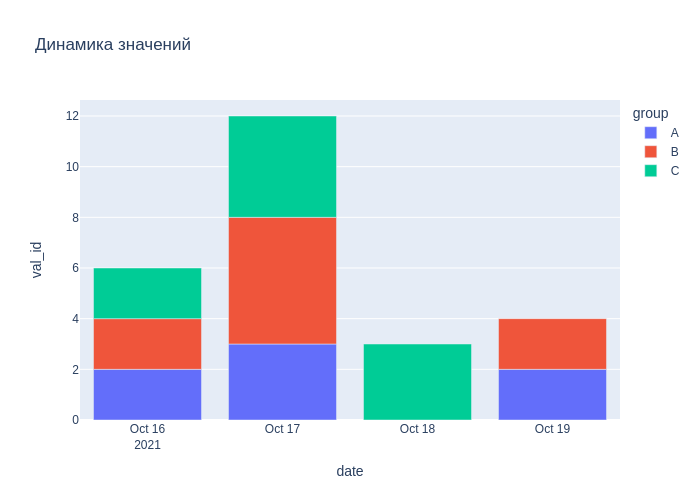

In [33]:
x_col = 'date'
y_col = 'val_id'
group_col = 'group'

# df = data.groupby([x_col, group_col], as_index=False)[y_col].nunique() # as_index=False почему-то теперь сбрасывает индекс
df = data.groupby([x_col, group_col])[y_col].nunique().reset_index()
display(df)

fig = px.bar(df, x=x_col, y=y_col, color=group_col, title="Динамика значений")

# fig.write_image("data/img/simple_bars.png") # Сохранить график как png-изображение
fig.show(renderer="png") # вывести график, как png-изображение (тогда github будет их воспроизводить)
# fig.show("notebook")

## Цикличный вариант

|    | date       |   A |   B |   C |
|---:|:-----------|----:|----:|----:|
|  0 | 2021-10-16 |   2 |   2 |   2 |
|  1 | 2021-10-17 |   3 |   5 |   4 |
|  2 | 2021-10-18 |   0 |   0 |   3 |
|  3 | 2021-10-19 |   2 |   2 |   0 |


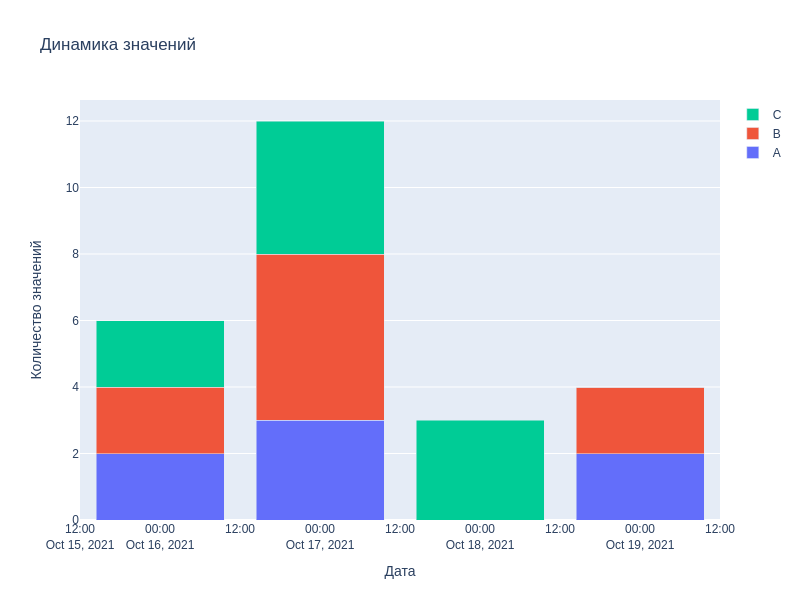

In [34]:
x_col = 'date'
y_col = 'val_id'
group_col = 'group'

df = data.pivot_table(index=x_col, columns=group_col, values=y_col, aggfunc='nunique').fillna(0).reset_index()
print(df.to_markdown())

width = 1000
height = 600
title = 'Динамика значений'
xaxis_title = "Дата"
yaxis_title = 'Количество значений'

fig = go.Figure(data=[
    go.Bar(name=group, x=df[x_col], y=df[group])
    
    for group in data[group_col].unique()
])

fig.update_layout(
    title = title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    width=800,
    height=600,
    barmode='stack',
)

fig.show(renderer="png")
# fig.show("notebook")

## Диаграмма с текстами

|    | date       |   A |   B |   C |   Sum | A%   | B%   | C%   |
|---:|:-----------|----:|----:|----:|------:|:-----|:-----|:-----|
|  0 | 2021-10-16 |   2 |   2 |   2 |     6 | 33%  | 33%  | 33%  |
|  1 | 2021-10-17 |   3 |   5 |   4 |    12 | 25%  | 42%  | 33%  |
|  2 | 2021-10-18 |   0 |   0 |   3 |     3 | 0%   | 0%   | 100% |
|  3 | 2021-10-19 |   2 |   2 |   0 |     4 | 50%  | 50%  | 0%   |


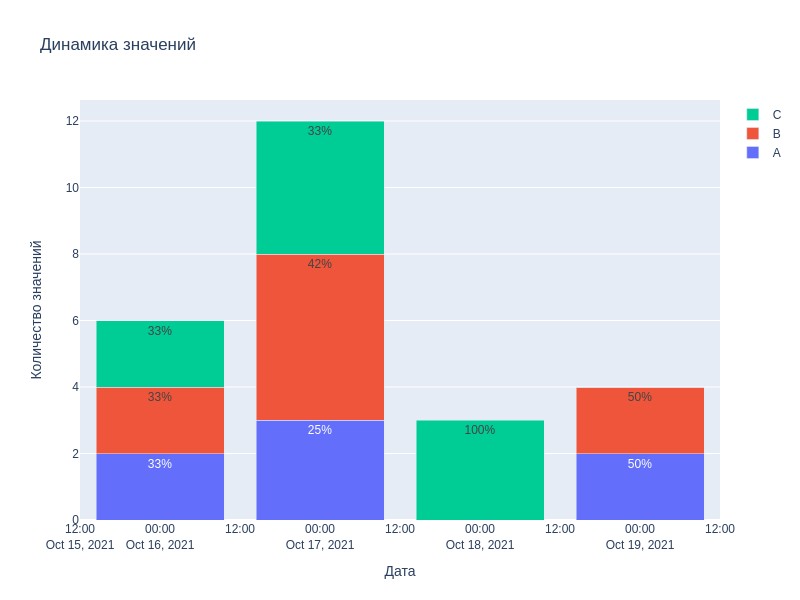

In [35]:
x_col = 'date'
y_col = 'val_id'
group_col = 'group'

df = data.pivot_table(index=x_col, columns=group_col, values=y_col, aggfunc='nunique').fillna(0).reset_index()

# Посчитаем проценты для каждой группы
groups = data[group_col].unique().tolist()
df['Sum'] = df[groups].sum(axis=1)
for group in data[group_col].unique():
    df[f"{group}%"] = df.apply(lambda row: f"{int(np.round(row[group]*100/row['Sum']))}%", axis=1)


print(df.to_markdown())

width = 1000
height = 600
title = 'Динамика значений'
xaxis_title = "Дата"
yaxis_title = 'Количество значений'


fig = go.Figure(data=[
    go.Bar(
        name=group, 
        x=df[x_col], y=df[group], 
        text=df[f'{group}%'],  textposition = 'inside'
    )
    
    for group in data[group_col].unique()
])

fig.update_layout(
    title = title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    width=800,
    height=600,
    barmode='stack',
)

fig.show(renderer="png")
# fig.show("notebook")

## Horizontal bar chart - горизонтальная диаграмма
- https://plotly.com/python/horizontal-bar-charts/

|    | date       |   A |   B |   C | A%   | B%   | C%   |
|---:|:-----------|----:|----:|----:|:-----|:-----|:-----|
|  0 | 2021-10-16 |   2 |   2 |   2 | 33%  | 33%  | 33%  |
|  1 | 2021-10-17 |   3 |   5 |   4 | 25%  | 42%  | 33%  |
|  2 | 2021-10-18 |   0 |   0 |   3 | 0%   | 0%   | 100% |
|  3 | 2021-10-19 |   2 |   2 |   0 | 50%  | 50%  | 0%   |


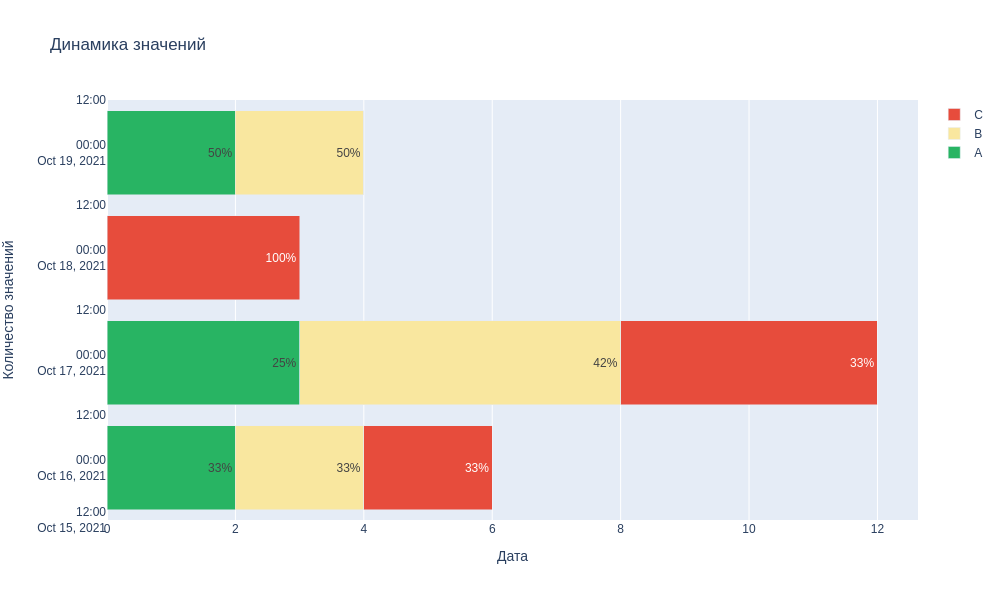

In [36]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique').fillna(0).reset_index()
groups = data.group.unique().tolist()


width = 1000
height = 600
title = 'Динамика значений'
xaxis_title = "Дата"
yaxis_title = 'Количество значений'

for group in groups:
    df[f"{group}%"] = (np.round(df[group]/df[groups].sum(axis=1), 2) * 100).astype('int').astype('str') + '%'

print(df.to_markdown())

fig = go.Figure(data=[
    go.Bar(name='A',y=df['date'], x=df['A'], marker_color="#28B463", text=df['A%'], textposition = 'inside'),
    go.Bar(name='B',y=df['date'], x=df['B'], marker_color="#F9E79F", text=df['B%'], textposition = 'inside'),
    go.Bar(name='C',y=df['date'], x=df['C'], marker_color="#E74C3C", text=df['C%'], textposition = 'inside'),

])

fig.update_layout(
    width=width,
    height=height,
    title = title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    barmode='stack',
)
fig.update_traces(orientation='h')

fig.show(renderer="png")
# fig.show("notebook")

# Pie chart - круговые диаграммы

- https://plotly.com/python/pie-charts/

## Простой вариант с текстами

|    | Группа   |   Количество |
|---:|:---------|-------------:|
|  0 | B        |            9 |
|  1 | C        |            9 |
|  2 | A        |            7 |


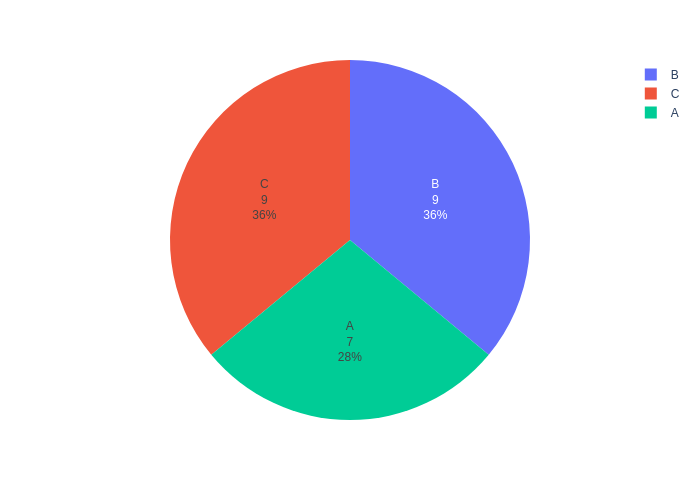

In [37]:
df = data.group.value_counts().reset_index().rename(columns={'index': 'Группа','group': 'Количество'})
print(df.to_markdown())

fig = px.pie(df, names='Группа', values= 'Количество')
fig.update_traces(textposition='inside', textinfo='value+percent+label')

fig.show(renderer="png")
# fig.show("notebook")

## Кргуговая диаграмма с текстами в легенде
Бывает полезно, когда есть маленькие доли

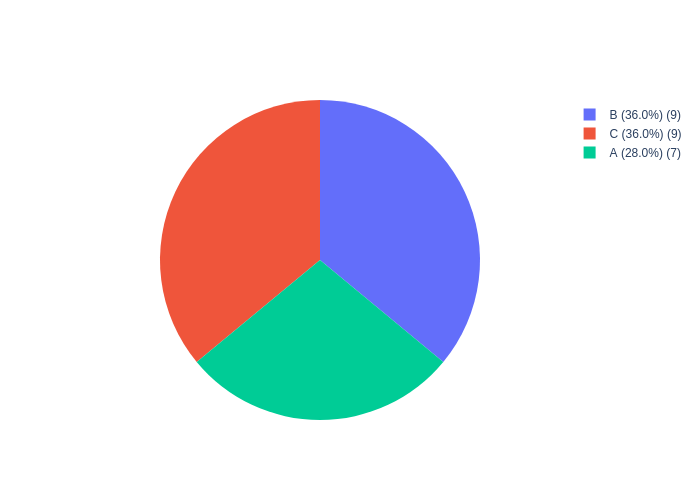

In [38]:
df = data.group.value_counts().reset_index().rename(columns={'index': 'Группа','group': 'Количество'})

df['Процент'] = df.apply(lambda row: np.round(row['Количество']*100/df['Количество'].sum(), 3), axis=1)
df['Текст'] = df.apply(lambda row: f"{row['Группа']} ({row['Процент']}%) ({row['Количество']})", axis=1)

fig = go.Figure(data=[
    go.Pie(labels=df['Текст'], values=df['Процент'])
])

fig.update_traces(hoverinfo='label+percent', textinfo='none', textfont_size=20)

fig.show(renderer="png")
# fig.show("notebook")

## Кастомные бины

In [39]:
# В разработке

#  Line chart - линейный график

## График с несколькими линиями

В некоторых случаях проще воспользоваться методом .scatter
- https://plotly.com/python/line-and-scatter/

|    | date       |   A |   B |   C |
|---:|:-----------|----:|----:|----:|
|  0 | 2021-10-16 |   2 |   2 |   2 |
|  1 | 2021-10-17 |   3 |   5 |   4 |
|  2 | 2021-10-18 |   0 |   0 |   3 |
|  3 | 2021-10-19 |   2 |   2 |   0 |


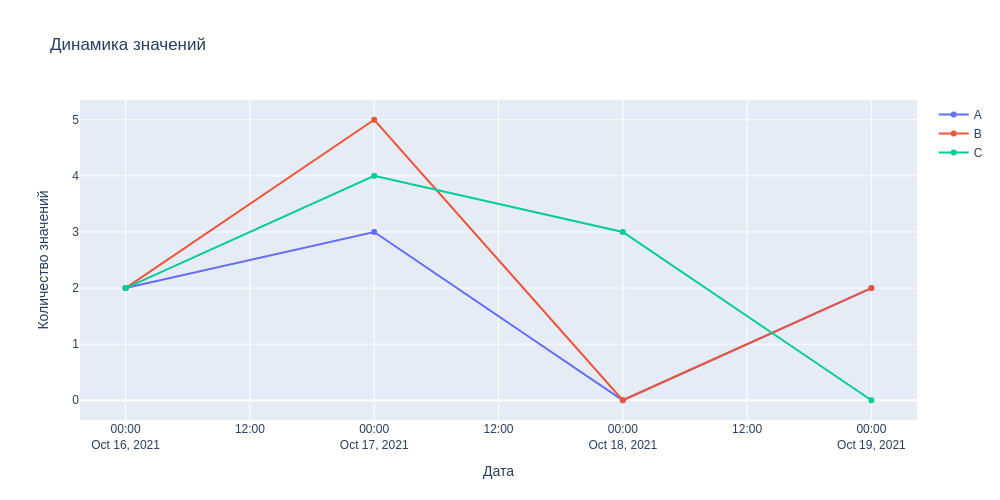

In [40]:
x_col = 'date'
y_col = 'val_id'
group_col = 'group'

df = data.pivot_table(index=x_col, columns=group_col, values=y_col, aggfunc='nunique').fillna(0).reset_index()
print(df.to_markdown())

width = 1000
height = 600
title = 'Динамика значений'
xaxis_title = "Дата"
yaxis_title = 'Количество значений'


fig = go.Figure(data=[
    go.Scatter(x=df[x_col], y=df[group], name=group)
    
    for group in data[group_col].unique()

])

fig.update_layout(
    width = width,
    title=title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title
)

fig.show(renderer="png")
# fig.show("notebook")

## График со скользящим средним
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [41]:
dates = pd.date_range(start='09/01/2021', end='10/30/2021')
values = np.random.choice(range(100), len(dates), replace=True)

rolling_df = pd.DataFrame({
    'date': dates,
    'value': values,
})
rolling_df['rolling'] = rolling_df.value.rolling(7).mean()

rolling_df.head(15)

,date,value,rolling
0,2021-09-01,25,NaN
1,2021-09-02,65,NaN
2,2021-09-03,97,NaN
3,2021-09-04,58,NaN
4,2021-09-05,81,NaN
5,2021-09-06,93,NaN
6,2021-09-07,84,71.857143
7,2021-09-08,3,68.714286
8,2021-09-09,10,60.857143
9,2021-09-10,34,51.857143


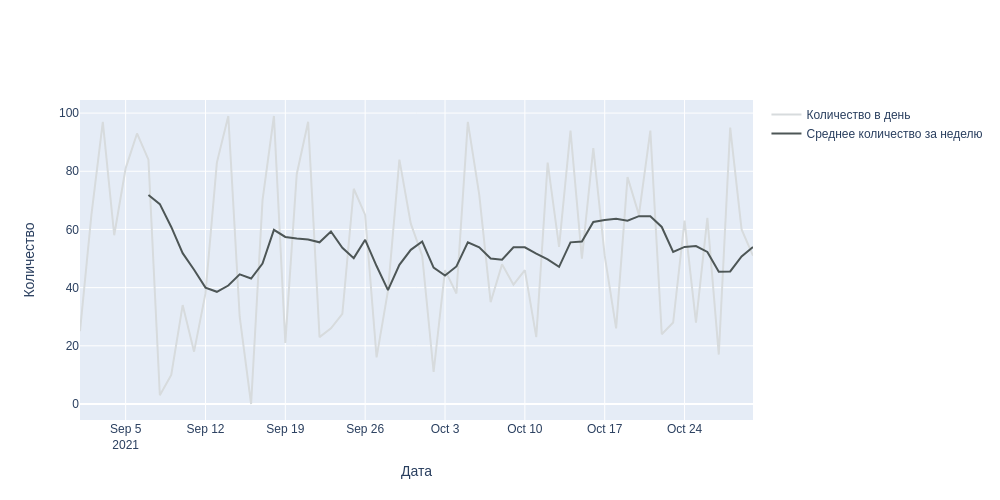

In [42]:
df = rolling_df

x_col = 'date'
y_col1 = 'value'
y_col2 = 'rolling'

width = 1000
height = 600
xaxis_title = "Дата"
yaxis_title = 'Количество'


fig = go.Figure(data=[
    
    go.Scatter(x=df[x_col], y=df[y_col1], marker_color='#D7DBDD', name = 'Количество в день'),
    go.Scatter(x=df[x_col], y=df[y_col2], marker_color='#4D5656', name = 'Среднее количество за неделю'),

])

fig.update_layout(
    width=width,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title
)

fig.show(renderer="png")
# fig.show("notebook")

## Границы ошибок

- [Plotly Doc: Continuous Error Bands in Python](https://plotly.com/python/continuous-error-bars/)

## Вертикальные линии и выделения областей

- https://plotly.com/python/horizontal-vertical-shapes/

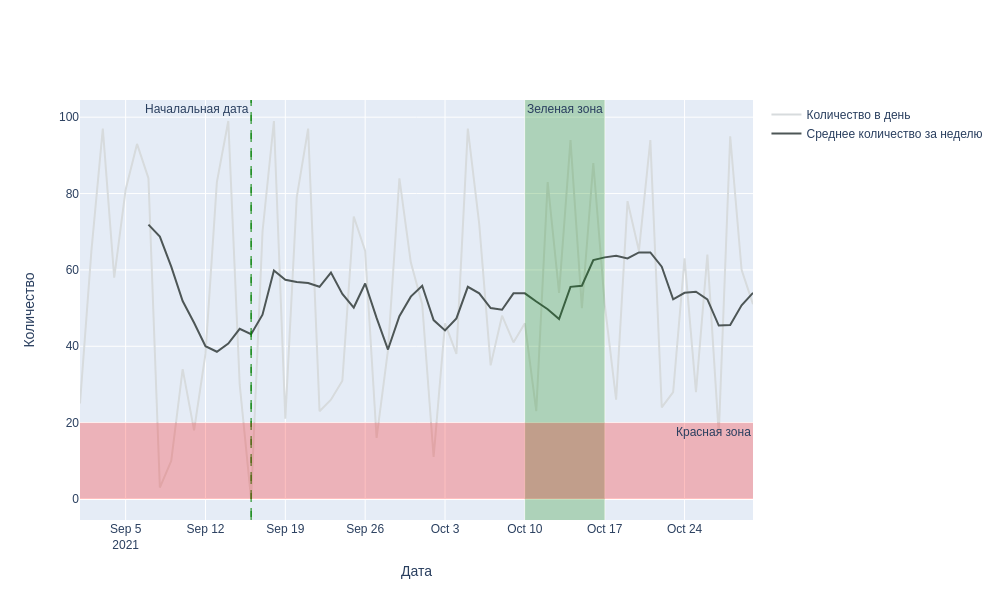

In [43]:
df = rolling_df

x_col = 'date'
y_col1 = 'value'
y_col2 = 'rolling'

width = 1000
height = 600
xaxis_title = "Дата"
yaxis_title = 'Количество'

fig = go.Figure(data=[
    go.Scatter(x=df[x_col], y=df[y_col1], marker_color='#D7DBDD', name = 'Количество в день'),
    go.Scatter(x=df[x_col], y=df[y_col2], marker_color='#4D5656', name = 'Среднее количество за неделю')
])

fig.update_layout(
    width=width,
    height = height,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title
)

fig.add_vrect(
    x0='2021-09-16', 
    x1='2021-09-16',
    line_width=1, 
    line_dash="dash", 
    line_color="green",
    annotation_text="Началальная дата",

)


fig.add_vrect(
    x0='2021-10-10', 
    x1='2021-10-17', 
    fillcolor="green", 
    opacity=0.25, 
    line_width=0,
    annotation_text="Зеленая зона",

)

fig.add_hrect(
    y0=0, 
    y1=20,
    fillcolor="red",
    opacity=0.25, 
    line_width=0,
    annotation_text="Красная зона",

)

fig.show(renderer="png")
# fig.show("notebook")

## Горизонтальные линии и разноцветные маркеры

In [44]:
# В разработке

# Визуализация графов

## 2D-Tree

### Пример из документации Plotly
- https://plotly.com/python/tree-plots/

In [45]:
import igraph
from igraph import Graph, EdgeSeq

In [46]:
nr_vertices = 25
v_label = list(map(str, range(nr_vertices)))
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

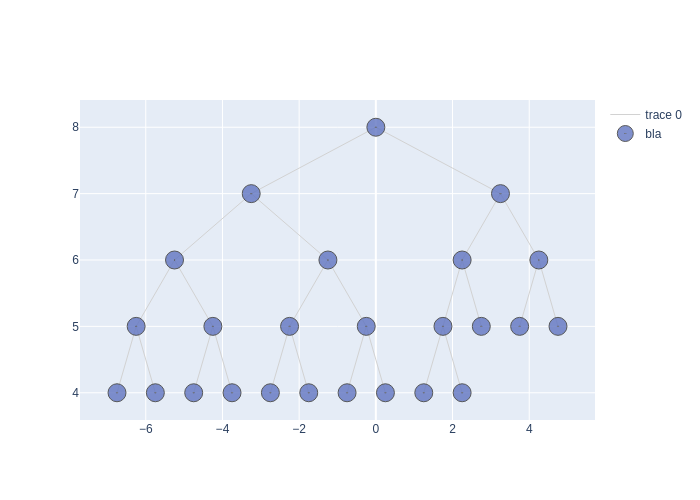

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

fig.show(renderer="png")
# fig.show("notebook")

In [48]:
def make_annotations(pos, text, font_size=10, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(
            dict(
                text=labels[k], # or replace labels with a different list for the text within the circle
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations

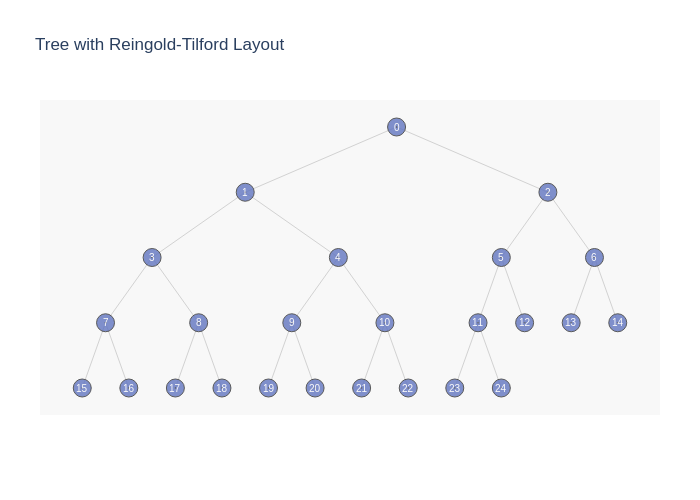

In [49]:
axis = dict(showline=False, # hide axis line, grid, ticklabels and  title
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            )

fig.update_layout(title= 'Tree with Reingold-Tilford Layout',
              annotations=make_annotations(position, v_label),
              font_size=12,
              showlegend=False,
              xaxis=axis,
              yaxis=axis,
              margin=dict(l=40, r=40, b=85, t=100),
              hovermode='closest',
              plot_bgcolor='rgb(248,248,248)'
)

fig.show(renderer="png")
# fig.show("notebook")

### Визуализация группировки

In [50]:
# В разработке

In [51]:
def groupcount(df, cols, char, prefix="_count"):
    grouplist = []
    
    for col in cols:
        grouplist.append(col)
        add = df.groupby([*grouplist])[char].nunique().reset_index()
        
        old, new = add.iloc[:,-1].name, f"{col}{prefix}"
        add = add.rename(columns={old: new})
        
        add = add[[*grouplist, new]]
        df = pd.merge(df, add, on=[*grouplist])
        grouplist.append(new)
        
    gc = df.groupby([*grouplist[:-1]])[char].nunique().to_frame().rename(columns={char: grouplist[-1]})
    return gc

groupcount_df = groupcount(data, cols=['group', 'sub_group'], char='val_id', prefix="_count")
groupcount_df = groupcount_df.reset_index()
groupcount_df['all'] = 'ALL'
groupcount_df['all_count'] = groupcount_df['group_count'].sum()
groupcount_df = groupcount_df[['all', 'all_count', 'group', 'group_count', 'sub_group', 'sub_group_count']]
groupcount_df

,all,all_count,group,group_count,sub_group,sub_group_count
0,ALL,84,A,7,a1,4
1,ALL,84,A,7,a2,2
2,ALL,84,A,7,a3,1
3,ALL,84,B,9,a2,1
4,ALL,84,B,9,b1,4
5,ALL,84,B,9,b2,3
6,ALL,84,B,9,b3,1
7,ALL,84,C,9,c1,5
8,ALL,84,C,9,c2,3
9,ALL,84,C,9,c3,1


### Визуализация глубокого дерева

In [52]:
hierarchy = pd.DataFrame({
    'id': [0, 1, 2, 3, 10, 11, 20, 21, 22, 100, 101, 210, 211, 212],
    'parent_id': [None, 0, 0, 0, 1, 1, 2, 2, 2, 10, 10, 21, 21, 21],
    'name': ['G0', 'G1', 'G2', 'G3', 'g10', 'g11', 'g20', 'g21', 'g22', 'g100', 'g101', 'g210', 'g211', 'g212'],
    'weight': [145, 55, 85, 5, 25, 30, 5, 60, 20, 10, 15, 10, 20, 30]
})

display(hierarchy)

,id,parent_id,name,weight
0,0,NaN,G0,145
1,1,0.0,G1,55
2,2,0.0,G2,85
3,3,0.0,G3,5
4,10,1.0,g10,25
5,11,1.0,g11,30
6,20,2.0,g20,5
7,21,2.0,g21,60
8,22,2.0,g22,20
9,100,10.0,g100,10


## 3D-Graph

### Пример из документации plotly
- https://plotly.com/python/v3/3d-network-graph/

In [53]:
with open('data/input/3DGraph', 'rb') as infile:
    data = pickle.load(infile)

print(data.keys())

dict_keys(['nodes', 'links'])


In [54]:
N = len(data['nodes'])
N

77

In [55]:
import igraph as ig

L = len(data['links'])
Edges = [(data['links'][k]['source'], data['links'][k]['target']) for k in range(L)]

G = ig.Graph(Edges, directed=False)

In [56]:
labels = []
group = []
for node in data['nodes']:
    labels.append(node['name'])
    group.append(node['group'])

In [57]:
layt = G.layout('kk', dim=3)

In [58]:
Xn = [layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn = [layt[k][1] for k in range(N)]# y-coordinates
Zn = [layt[k][2] for k in range(N)]# z-coordinates
Xe = []
Ye = []
Ze = []
for e in Edges:
    Xe += [layt[e[0]][0],layt[e[1]][0], None] # x-coordinates of edge ends
    Ye += [layt[e[0]][1],layt[e[1]][1], None]
    Ze += [layt[e[0]][2],layt[e[1]][2], None]

In [59]:
import chart_studio.plotly as py

trace1 = go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2 = go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=group,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               hoverinfo='text'
               )

axis = dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Network of coappearances of characters in Victor Hugo's novel<br> Les Miserables (3D visualization)",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="Data source: <a href='http://bost.ocks.org/mike/miserables/miserables.json'>[1] miserables.json</a>",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

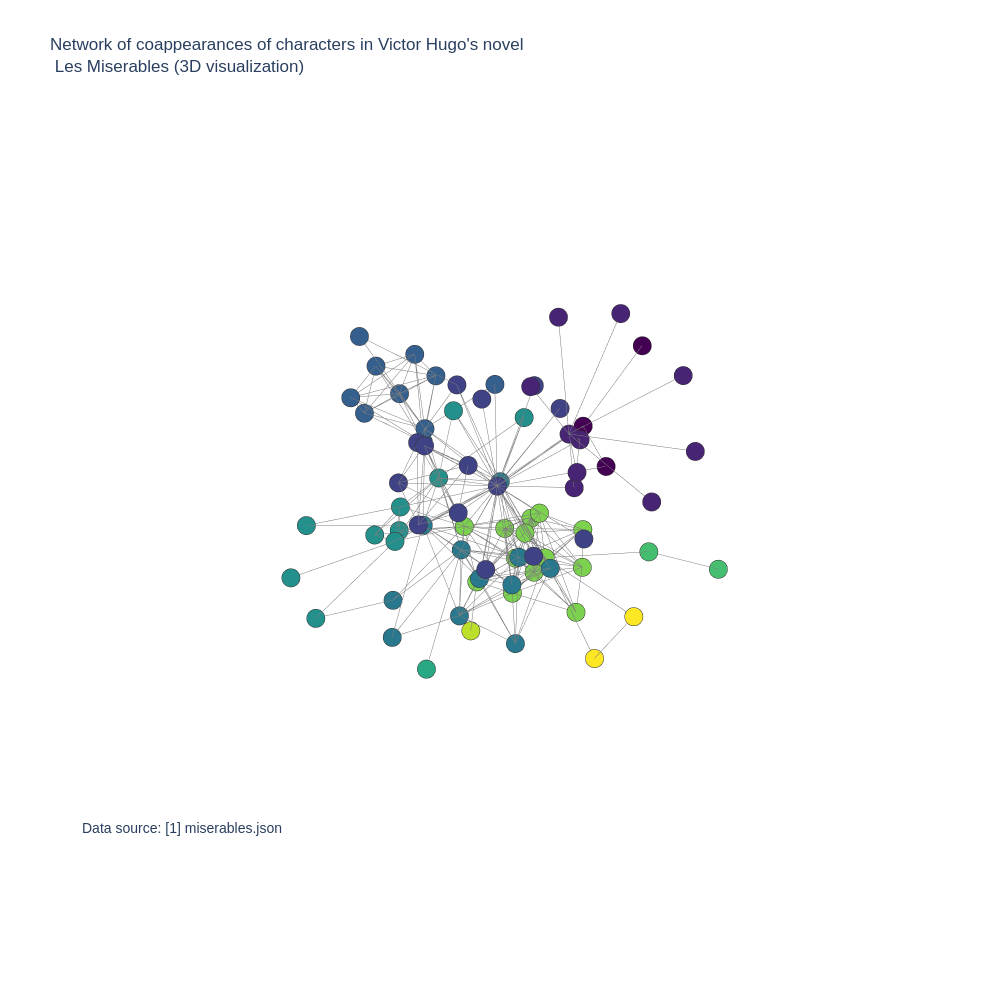

In [60]:
data=[trace1, trace2]
fig = go.Figure(data=data, layout=layout)

# py.iplot(fig, filename='Les-Miserables')

fig.show(renderer="png")
# fig.write_html("data/results/3DGraph.html")

# Визуализация катировок
- https://plotly.com/python/financial-charts/

In [61]:
# Написать функцию генерации
stock = pd.read_csv('data/input/stock.csv')
stock.head()

,hour,open,high,low,close
0,10.0,108230.0,108380.0,107520.0,107640.0
1,11.0,107620.0,107690.0,107350.0,107470.0
2,12.0,107460.0,107820.0,107340.0,107770.0
3,13.0,107780.0,108210.0,107660.0,108080.0
4,14.0,108080.0,108330.0,107990.0,108170.0


## Candlestick Charts - японские свечи
- https://plotly.com/python/candlestick-charts/

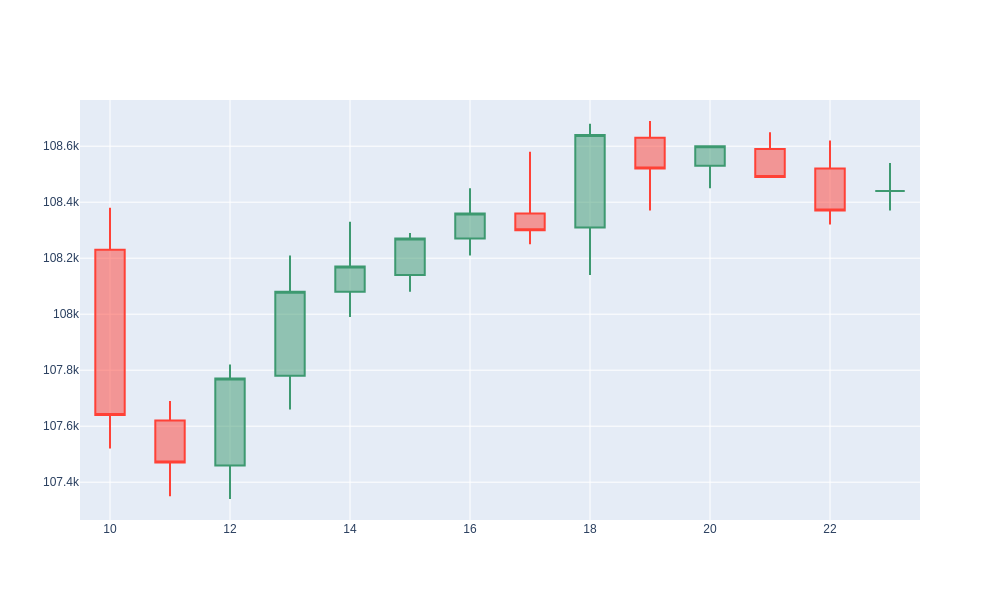

In [62]:
df = stock

width = 1000
height = 600

fig = go.Figure(data=[
    go.Candlestick(
        x=df['hour'],
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'])
])

fig.update_layout(
    width = width,
    height = height,
    xaxis_rangeslider_visible=False
)

fig.show(renderer="png")
# fig.show("notebook")

## OHLC Charts
- https://plotly.com/python/ohlc-charts/

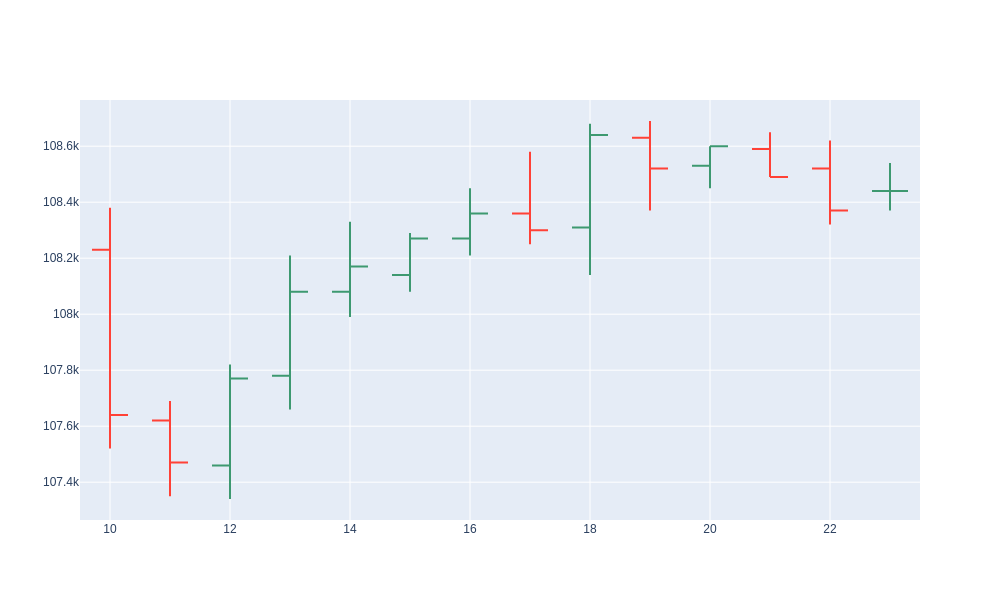

In [63]:
df = stock

width = 1000
height = 600

fig = go.Figure(data=[
    go.Ohlc(
        x=df['hour'],
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'])
])

fig.update_layout(
    width = width,
    height = height,
    xaxis_rangeslider_visible=False
)

fig.show(renderer="png")
# fig.show("notebook")

# 3D-charts

[Plotly: 3D Surface Plots in Python](https://plotly.com/python/3d-surface-plots/)

In [64]:
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [5, 4, 3, 2, 1],
})

data['z'] = data['x'] + data['y']

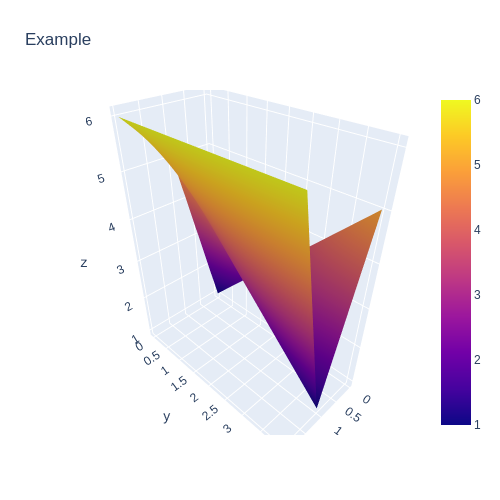

In [65]:
fig = go.Figure(data=[go.Surface(z=data.values)])

fig.update_layout(title='Example', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show('png')